In [182]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


a. Obtain and preprocess a customer churn dataset.
https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset?resource=download

In [183]:
df = pd.read_csv('/workspaces/codespaces-jupyter/data/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


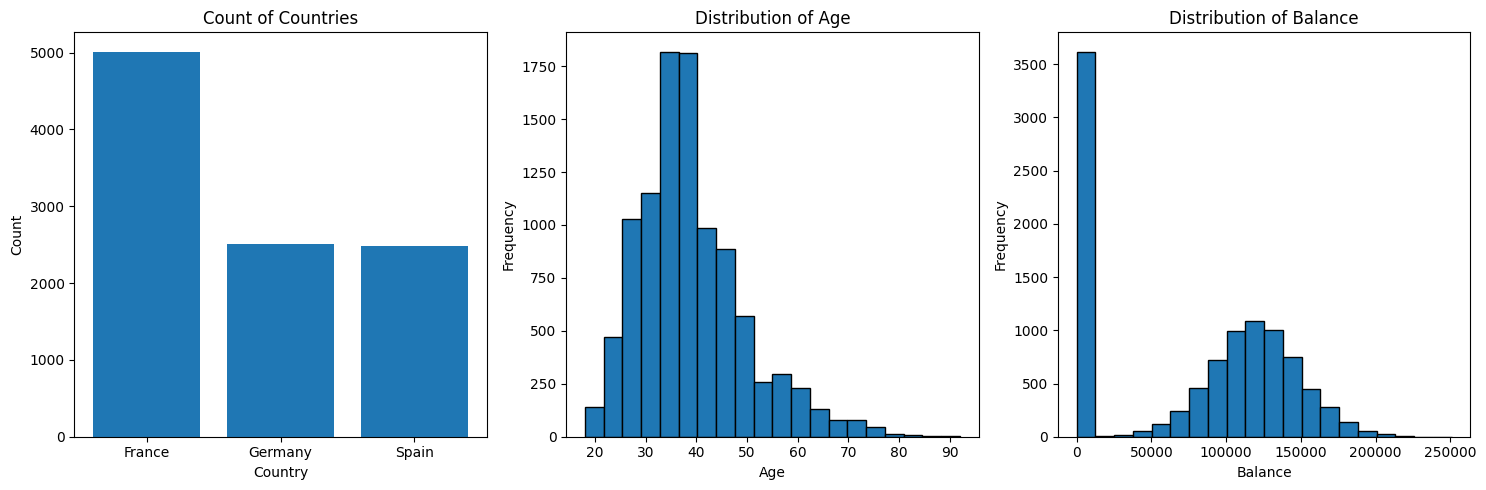

In [184]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Bar chart of counts of 'country'
country_counts = df['country'].value_counts()
axes[0].bar(country_counts.index, country_counts.values)
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Count')
axes[0].set_title('Count of Countries')

# Plot 2: Histogram of 'age'
axes[1].hist(df['age'], bins=20, edgecolor='black')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Age')

# Plot 3: Histogram of 'balance'
axes[2].hist(df['balance'], bins=20, edgecolor='black')
axes[2].set_xlabel('Balance')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Balance')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [185]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [187]:
#We will One-hot encode variable country and binary mapping for gender variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['country'] = label_encoder.fit_transform(df['country'])

gender_mapping = {'Male': 0, 'Female': 1}
df['gender'] = df['gender'].map(gender_mapping)

df.drop('customer_id', axis=1, inplace=True)


b. Split the data into training and testing sets.


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [189]:
X = df.drop('churn', axis=1)
y = df['churn']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#20% of the data will be used for testing

#Normalizing the data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)



import torch
import torch.nn as nn
import torch.optim as optim

#Converting data to PyTorch Tensors
X_train_tensor = torch.Tensor(X_train_normalized)
y_train_tensor = torch.Tensor(y_train.values.reshape(-1, 1))

X_test_tensor = torch.Tensor(X_test_normalized)
y_test_tensor = torch.Tensor(y_test.values.reshape(-1, 1))


#Creating pytorch data and loaders
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

c. Implement a feed-forward neural network using PyTorch or TensorFlow.


In [190]:
#Model configuration
import torch.nn.init as init

# Define a feed-forward neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 64)  # Input size 10 features
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # Output size 1 for binary classification

     #   init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')
      #  init.kaiming_uniform_(self.fc2.weight, nonlinearity='relu')
       # init.kaiming_uniform_(self.fc3.weight, nonlinearity='sigmoid')

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # Apply sigmoid activation for binary classification
        return x

net = Net()

# Define a loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss

#momentum
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#mini-batch
#optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

#RMSProp
optimizer = torch.optim.RMSprop(net.parameters(),lr=0.001, alpha=0.9)


print("Your network is ready for training!")


Your network is ready for training!


d. Experiment with different network architectures, activation functions, and learning rates.

In [191]:
from tqdm import tqdm
EPOCHS = 4
print("Training...")
for epoch in range(EPOCHS):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch + 1} of {EPOCHS}", leave=True, ncols=80)):
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch + 1} loss: {epoch_loss:.4f}")


#Save trained model
PATH = './model2.pth'
torch.save(net.state_dict(), PATH)
print("Trained model saved.")

Training...


Epoch 1 of 4: 100%|██████████████████████████| 125/125 [00:00<00:00, 849.75it/s]


Epoch 1 loss: 0.4817


Epoch 2 of 4: 100%|██████████████████████████| 125/125 [00:00<00:00, 918.24it/s]


Epoch 2 loss: 0.4127


Epoch 3 of 4: 100%|██████████████████████████| 125/125 [00:00<00:00, 872.78it/s]


Epoch 3 loss: 0.3854


Epoch 4 of 4: 100%|██████████████████████████| 125/125 [00:00<00:00, 902.43it/s]

Epoch 4 loss: 0.3657
Trained model saved.


In [192]:

learning_rates = [0.001, 0.01, 0.1, 0.2, 0.3]
activation_functions = [torch.relu, torch.sigmoid, torch.tanh]

e. Evaluate the model using appropriate metrics, such as accuracy, precision, recall, and F1 score.


In [193]:
from sklearn.metrics import classification_report


for lr in learning_rates:
    for activation_fn in activation_functions:
        # Define and train the model
        net = Net()
        criterion = nn.BCELoss()
        optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
        # Training loop...

        PATH = './model2.pth'
        net.load_state_dict(torch.load(PATH))
        net.eval()

        # Evaluate the model
        with torch.no_grad():
            outputs = net(torch.Tensor(X_test_normalized))
            predicted = (outputs >= 0.5).float()  # Convert probabilities to binary predictions
            report = classification_report(y_test, predicted, target_names=['No Churn', 'Churn'])
            print(f"Learning Rate: {lr}, Activation Function: {activation_fn.__name__}")
            print(report)



Learning Rate: 0.001, Activation Function: relu
              precision    recall  f1-score   support

    No Churn       0.86      0.97      0.91      1586
       Churn       0.80      0.41      0.54       414

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Learning Rate: 0.001, Activation Function: sigmoid
              precision    recall  f1-score   support

    No Churn       0.86      0.97      0.91      1586
       Churn       0.80      0.41      0.54       414

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Learning Rate: 0.001, Activation Function: tanh
              precision    recall  f1-score   support

    No Churn       0.86      0.97      0.91      1586
       Churn       0.80      0.41      0.54       414

    accuracy                       

f. Submit a written report (approximately 1000-1500 words) discussing the approach, model architecture,
training process, and evaluation results